# Bitcoin Prediction

In this dataset we will look into bitcoin daily price development from 2010 to 2024. This dataset includes:

* Open: Price at 00:00:00
* Close: Price at 23:59:59
* High: Daily Maximum
* Low: Daily Minimum
* Volume: Daily Trading Volume


[Kaggle: Bitcoin daily (Jul 2010-Mar 2024)](https://www.kaggle.com/datasets/krairy/bitcoin-daily-price-and-vol-jul-2010-mar-2024?rvi=1)

In [97]:
# %pip install pandas
# %pip install numpy
# %pip install cudf-cu11 --extra-index-url=https://pypi.nvidia.com # 11/12 depending on CuDA, win/linux 
# %pip install matplotlib
# %pip install mplfinance

### Cuda Enabled Pandas

On machines, windows or linux, with nvidia's CUDA toolkit installed, [cudf.pandas](https://rapids.ai/cudf-pandas/) can be utilised to accelerate on the GPU, with automatic CPU fallback if needed.

In [98]:
# %pip install cudf-cu11 --extra-index-url=https://pypi.nvidia.com # 11/12 depending on CuDA

In [99]:
# %load_ext cudf.pandas

### Packages and Data

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

In [101]:
file_path = "./data/raw/btc.csv"
df = pd.read_csv(file_path)

In [102]:
df.tail()

,Date,Open,High,Low,Close,Volume
4989,2024-03-15,71387.9,72357.1,65630.7,69403.8,7.832045e+10
4990,2024-03-16,69392.5,70046.3,64801.4,65315.1,4.684220e+10
4991,2024-03-17,65316.3,68845.7,64545.3,68390.6,4.471686e+10
4992,2024-03-18,68371.3,68897.1,66594.2,67548.6,4.926158e+10
4993,2024-03-19,67556.1,68106.9,61536.2,61912.8,7.421584e+10


### Data Inspection

In [103]:
df.shape

(4994, 6)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4994 non-null   object 
 1   Open    4994 non-null   float64
 2   High    4994 non-null   float64
 3   Low     4994 non-null   float64
 4   Close   4994 non-null   float64
 5   Volume  4988 non-null   float64
dtypes: float64(5), object(1)
memory usage: 234.2+ KB


In [105]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    6
dtype: int64

## Patching spotted data

- invesiting the volume NaN values in the dataset, show signs of previous patchwork due to missing data.
- since the data patchwork is very early in the dataset, it should not impact the prediction

In [106]:
df.loc[df['Volume'].isna()]

,Date,Open,High,Low,Close,Volume
337,2011-06-20,17.5,17.5,17.5,17.5,NaN
338,2011-06-21,17.5,17.5,17.5,17.5,NaN
339,2011-06-22,17.5,17.5,17.5,17.5,NaN
340,2011-06-23,17.5,17.5,17.5,17.5,NaN
341,2011-06-24,17.5,17.5,17.5,17.5,NaN
342,2011-06-25,17.5,17.5,17.5,17.5,NaN


In [107]:
# Forward fill NaN values in the 'Volume' column
df['Volume'] = df['Volume'].ffill()

In [108]:
# Verify if NaN values have been filled
nan_rows = df[df['Volume'].isna()]

In [109]:
print("Remaining NaN values after forward filling:", len(nan_rows))

Remaining NaN values after forward filling: 0


In [110]:
# Step 3: Prepare Data
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime object
df.set_index('Date', inplace=True)  # Set 'Date' as index

## Visual Representation

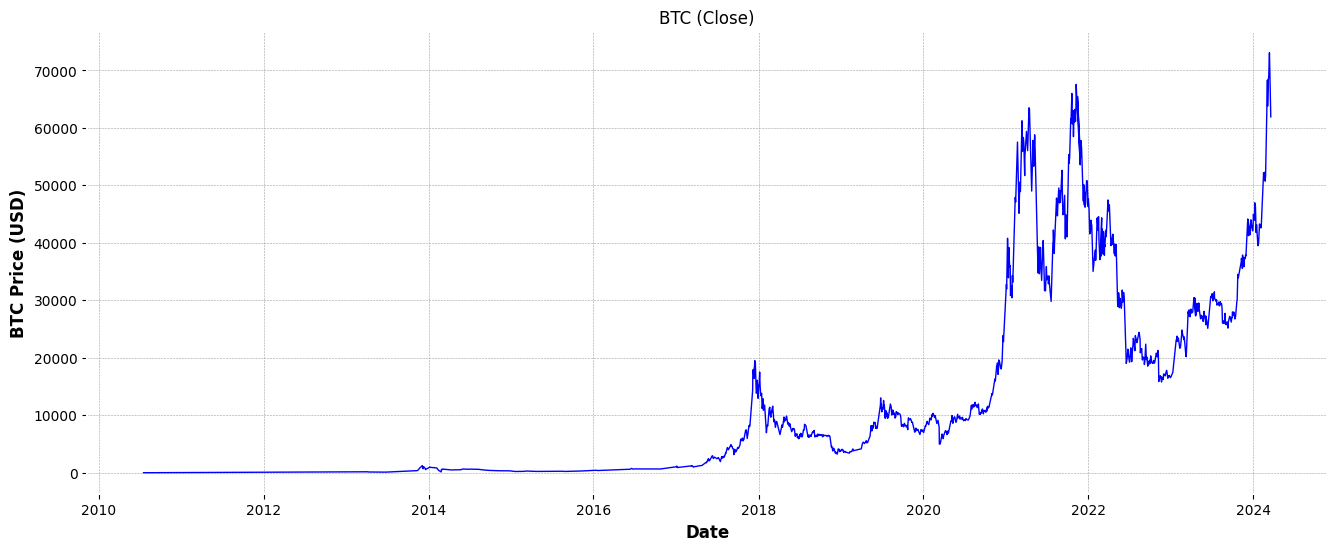

In [111]:
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Close'], color='blue', linewidth=1)
plt.title('BTC (Close)')
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')
plt.grid(True)

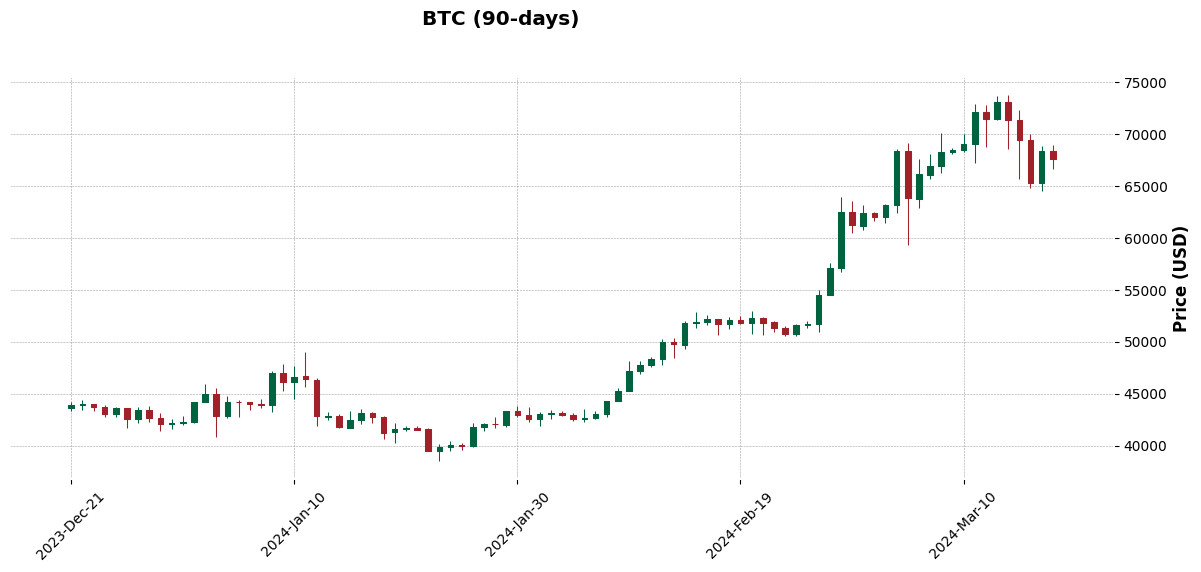

In [112]:
# Step 4: Plot the candlestick
mpf.plot(df[-90: -1], figratio=(16,6), type='candle', style='charles', title='BTC (90-days)', ylabel='Price (USD)')

### ARIMA

ARIMA is a widely used time series forecasting model known for its effectiveness in capturing linear trends and seasonal patterns in data. It combines autoregressive (AR) and moving average (MA) components with differencing to make the data stationary.

In [120]:
# limiting our dataset
df_arima = df["Close"]

In [121]:
X_train = df_arima[:3000]
X_test = df_arima[3000:]

In [122]:
print(f"training set size: {X_train.shape}")
print(f"validation set size: {X_test.shape}")

training set size: (3000,)
validation set size: (1994,)


### SARIMA

Seasonal Autoregressive Integrated Moving Average (SARIMA) is a sophisticated extension of the ARIMA model. It is specifically designed to handle time series data with seasonal patterns.

In [123]:
# limiting our dataset
df_sarima = df["Close"]

### Linear Regression

In [ ]:
# limiting our dataset
df_reg = df["Close"]

In [116]:
# create training split
x_train = df_reg[:3000]
y_train = df_reg[3000:]

In [117]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

Type of x_train: <class 'pandas.core.series.Series'>
First five elements of x_train are:
 Date
2010-07-18    0.1
2010-07-19    0.1
2010-07-20    0.1
2010-07-21    0.1
2010-07-22    0.1
Name: Close, dtype: float64


In [118]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of y_train: <class 'pandas.core.series.Series'>
First five elements of y_train are:
 Date
2018-10-04    6576.7
2018-10-05    6622.5
2018-10-06    6588.3
2018-10-07    6603.0
2018-10-08    6652.2
Name: Close, dtype: float64


In [119]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (3000,)
The shape of y_train is:  (1994,)
Number of training examples (m): 3000


### RNN (Recurrent Neural Network)

### LSTM (Long Short-Term Memory):

LSTM is a type of recurrent neural network (RNN) that is exceptionally adept at capturing long-range dependencies in sequential data. Unlike traditional feedforward neural networks, LSTM networks have a mechanism to selectively remember and forget information over extended sequences, making them powerful tools for time series forecasting. How it works:


* **Memory Cells**: LSTM networks have memory cells that can store and access information over long sequences.
* **Gates**: They use gates to control the flow of information into and out of the memory cells, which helps in managing long-term dependencies.
* **Backpropagation Through Time (BPTT)**: LSTM networks are trained using backpropagation through time, which allows them to learn from past sequences

* **Root-mean-square deviation (RMSE)**:  One of the two main performance indicators for a regression model
* **R-squared (R2)**: This metric measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with 1 indicating a perfect fit where all variance is explained by the model, and 0 indicating no explanatory power.